# **IRIS FLOWER SPECIES CLASSIFICATION USING DECISION TREE**


**Problem Statement:**

The objective of this project is to develop a machine learning classification model that predicts the species of an Iris flower (setosa, versicolor, virginica) based on its sepal and petal measurements.

## **Exploratory Data Analysis(EDA):**

In [53]:
# Importing the modules for working with dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Loading the dataset.
df = pd.read_csv('iris.csv')

In [55]:
# Checking the dataset with top 5 rows.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**Observation:**

The dataset contains five columns: sepal_length, sepal_width, petal_length, petal_width, and species.

In [57]:
# Checking the target column.
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

**Observation:**

The target column species contains three unique categories: setosa, versicolor, and virginica.

This confirms that the problem is a multi-class classification task with clearly defined class labels.

In [58]:
# Checking the shape of the dataset.
df.shape

(150, 5)

The dataset contains 150 rows and 5 columns.

In [59]:
# Checking the information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Observation:**

Four columns are numerical features and one column "species" is categorical.
No missing values are observed at this stage.

In [60]:
# Describing the dataset w r t central tendencies.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Observation:**

Numerical features have reasonable ranges and variability.
Petal length and petal width show higher variation compared to sepal features, indicating they may be strong predictors.

In [61]:
# Count of each class
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


**Observation:**

The dataset is perfectly balanced with 50 samples per class, which is ideal for classification tasks.

## **Univariate Analysis:**

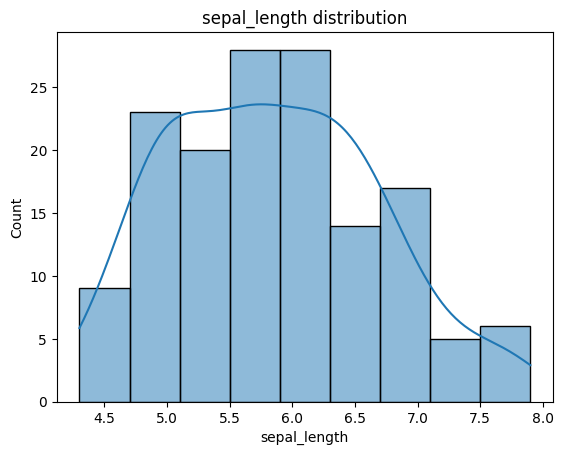

In [62]:
# Distribution of sepal length
sns.histplot(df['sepal_length'],kde=True)
plt.title('sepal_length distribution')
plt.show()

**Observation:**

Sepal length follows an approximately unimodal distribution with mild skewness and limited class separation.

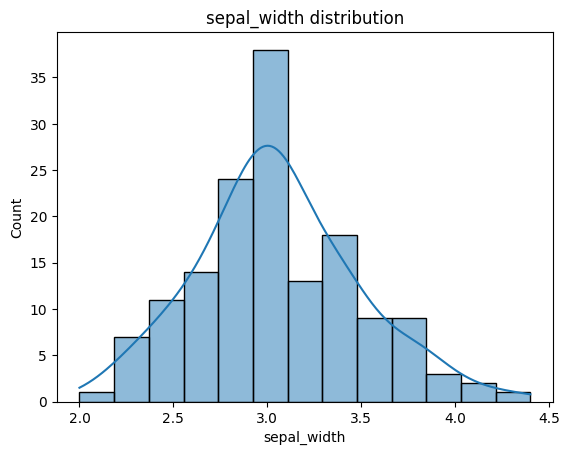

In [63]:
# Distribution of sepal width
sns.histplot(df['sepal_width'],kde=True)
plt.title('sepal_width distribution')
plt.show()

**Observation:**

Sepal width exhibits a unimodal distribution with mild skewness and limited class-separating ability.

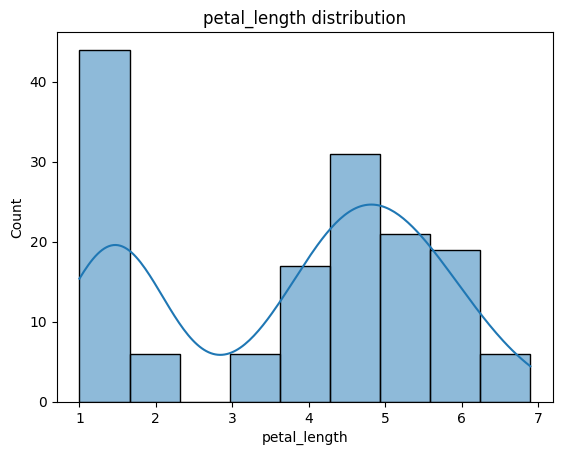

In [64]:
# Distribution of petal length
sns.histplot(df['petal_length'],kde=True)
plt.title('petal_length distribution')
plt.show()

**Observation:**

Petal length shows a multi-modal distribution, suggesting clear separation among different species.

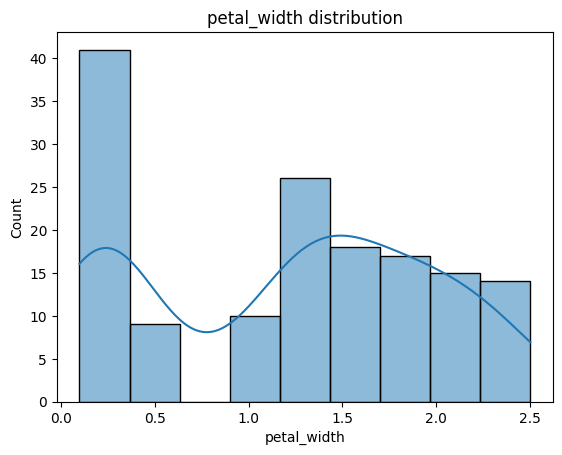

In [65]:
# Distribution of petal width
sns.histplot(df['petal_width'],kde=True)
plt.title('petal_width distribution')
plt.show()

**Observation:**

Petal width exhibits a multi-modal distribution, making it a strong feature for distinguishing between species.

In [66]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


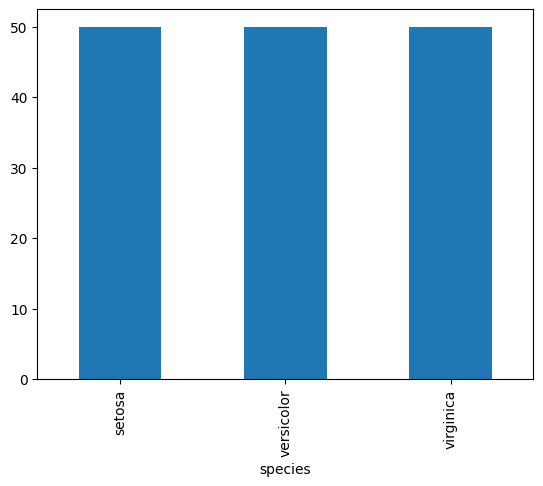

In [67]:
# Visualizing the distribution of target classes to check class balance.
df['species'].value_counts().plot(kind='bar')
plt.show()

**Observation:**

The bar plot shows that all three species classes have an equal number of samples.
This confirms that the target variable is balanced, reducing the risk of model bias toward any particular class and making accuracy a reliable evaluation metric.

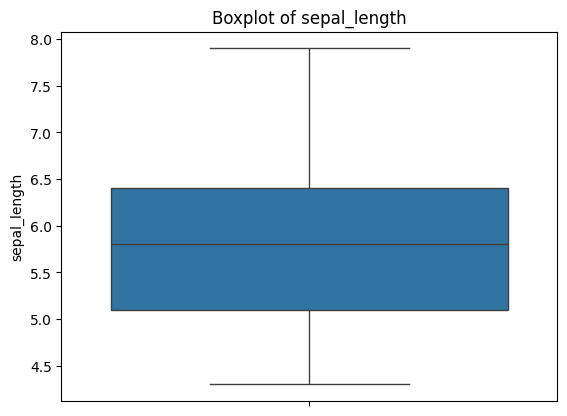

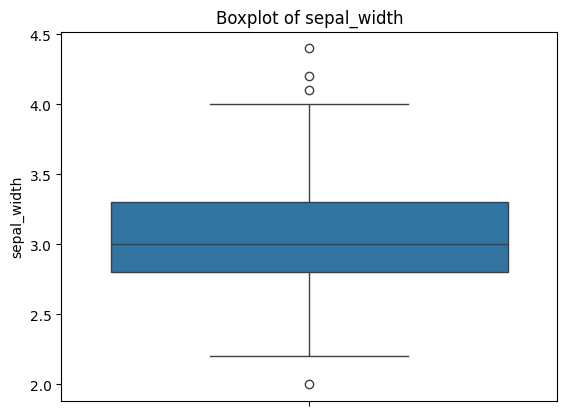

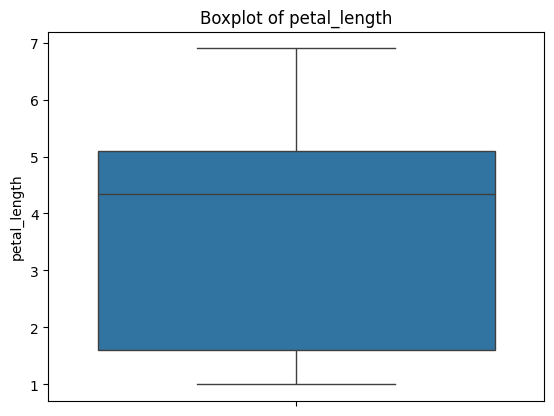

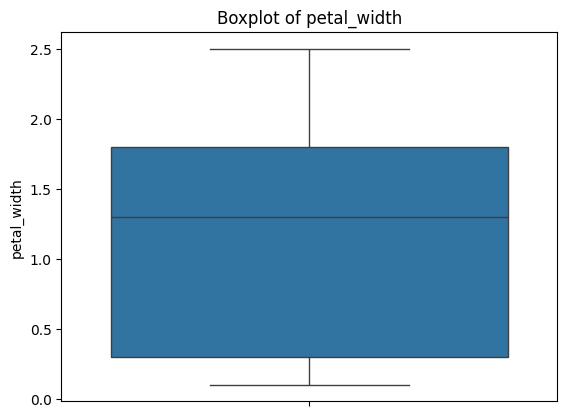

In [68]:
# List of numerical columns (excluding target)
num_cols = df.select_dtypes(include='number').columns

# Create boxplots for each numerical feature
for col in num_cols:
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**Observation:**

Univariate boxplots across all numerical features indicate that the data is largely free of extreme outliers.
While minor variations exist, none of the features require explicit outlier treatment, especially considering the use of a tree-based model which is robust to such variations.

## **Bivariate Analysis:**

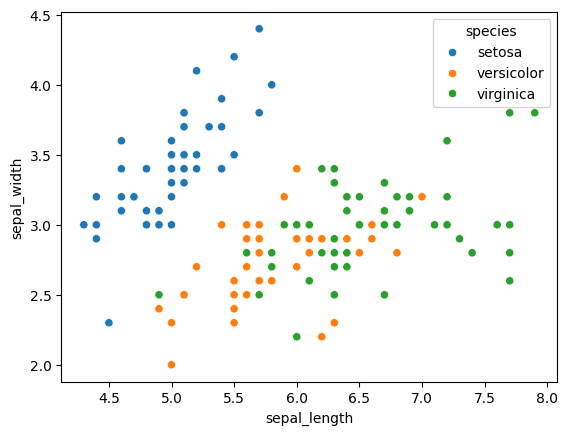

In [69]:
# Scatter plot to analyze the relationship between sepal length and sepal width
sns.scatterplot(data= df, x = 'sepal_length', y= 'sepal_width',hue= 'species')
plt.show()

**Observation:**

The scatter plot shows significant overlap among all three species for sepal length and sepal width.
This indicates that these two features together provide limited class separation and are weaker predictors compared to petal-based features.

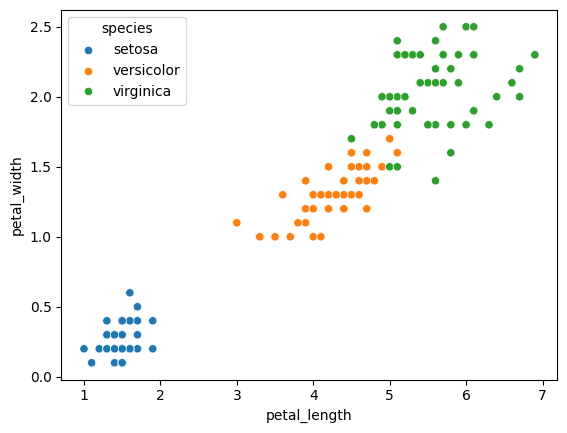

In [70]:
# Scatter plot: Petal Length vs Petal Width
sns.scatterplot(data= df, x = 'petal_length', y= 'petal_width',hue= 'species')
plt.show()

**Observation:**

Petal length and petal width show a strong positive relationship, indicating potential redundancy but also high predictive strength.

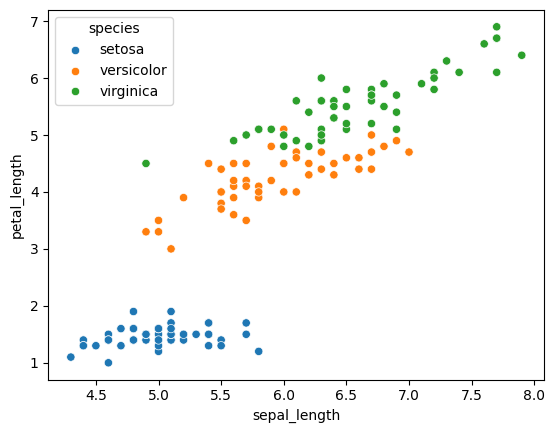

In [71]:
# Scatter plot to analyze the relationship between sepal length and petal length
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species')
plt.show()

**Observation:**

The scatter plot shows clear clustering of species, especially separating setosa from the other two classes.
Petal length demonstrates strong dependency on sepal length and provides good discriminative ability, making it an important feature for classification.

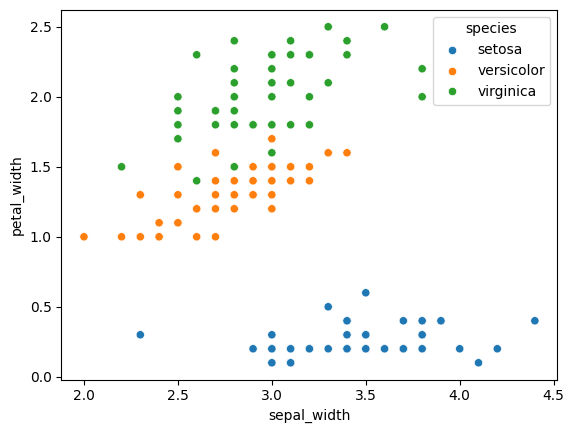

In [72]:
# Scatter plot to examine the relationship between sepal width and petal width
sns.scatterplot(data=df, x='sepal_width', y='petal_width', hue='species')
plt.show()

**Observation:**

The scatter plot reveals that petal width provides clear separation of species, while sepal width shows considerable overlap.
This further confirms that petal width is a strong predictive feature, whereas sepal width has limited discriminative power.

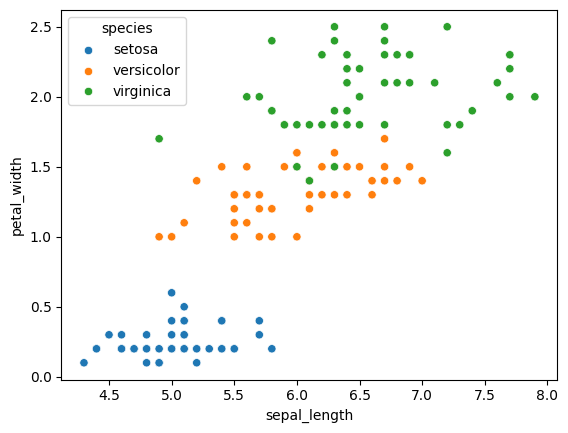

In [73]:
# Scatter plot to analyze the relationship between sepal length and petal width
sns.scatterplot(data=df, x='sepal_length', y='petal_width', hue='species')
plt.show()

**Observation:**

The scatter plot shows that petal width provides clear class separation, especially for setosa, while sepal length shows overlap among species.
This indicates that petal width is a more influential feature for classification compared to sepal length.

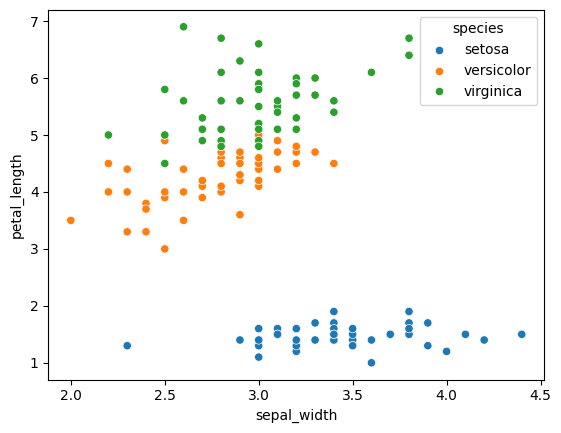

In [74]:
# Scatter plot to analyze the relationship between sepal width and petal length across species
sns.scatterplot(data=df, x='sepal_width', y='petal_length', hue='species')
plt.show()

**Observation:**

The scatter plot shows distinct separation of species driven mainly by petal length, while sepal width exhibits significant overlap.
This confirms that petal length is a strong discriminative feature, whereas sepal width has limited influence on classification.

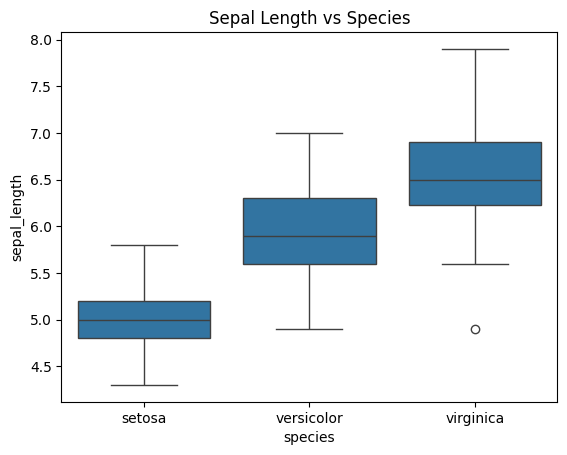

In [75]:
# Sepal length vs species
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Sepal Length vs Species')
plt.show()

**Observation:**

Sepal length shows some variation across species, but there is noticeable overlap.
This suggests that sepal length alone may not strongly distinguish between all classes.

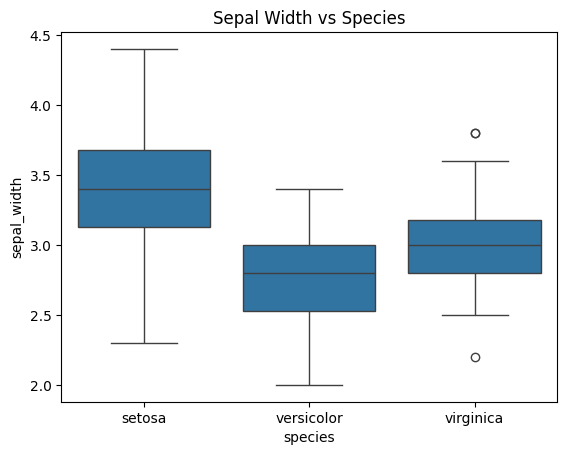

In [76]:
# Sepal width vs species
sns.boxplot(x='species', y='sepal_width', data=df)
plt.title('Sepal Width vs Species')
plt.show()

**Observation:**

Sepal width exhibits significant overlap among species, shows limited class-separating ability for classification.

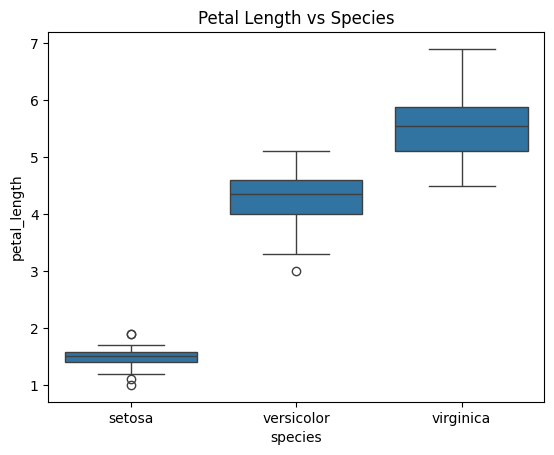

In [77]:
# Petal length vs species
sns.boxplot(x='species', y='petal_length', data=df)
plt.title('Petal Length vs Species')
plt.show()

**Observation:**

Petal length clearly separates setosa from the other species and shows good separation overall, making it a strong predictive feature.

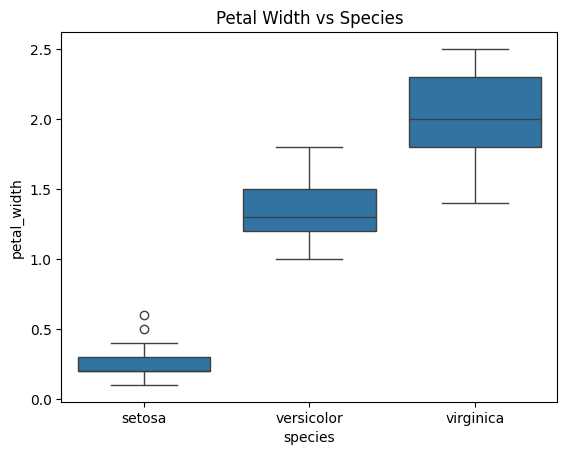

In [78]:
# Petal width vs species
sns.boxplot(x='species', y='petal_width', data=df)
plt.title('Petal Width vs Species')
plt.show()

**Observation:**

Petal width demonstrates clear class separation, especially for setosa, indicating high importance for classification.

**Bivariate Summary:**

Bivariate analysis shows that petal features (petal length and petal width) have strong class-separating ability, while sepal features exhibit considerable overlap, making them less informative individually.

## **Multivariate Analysis:**

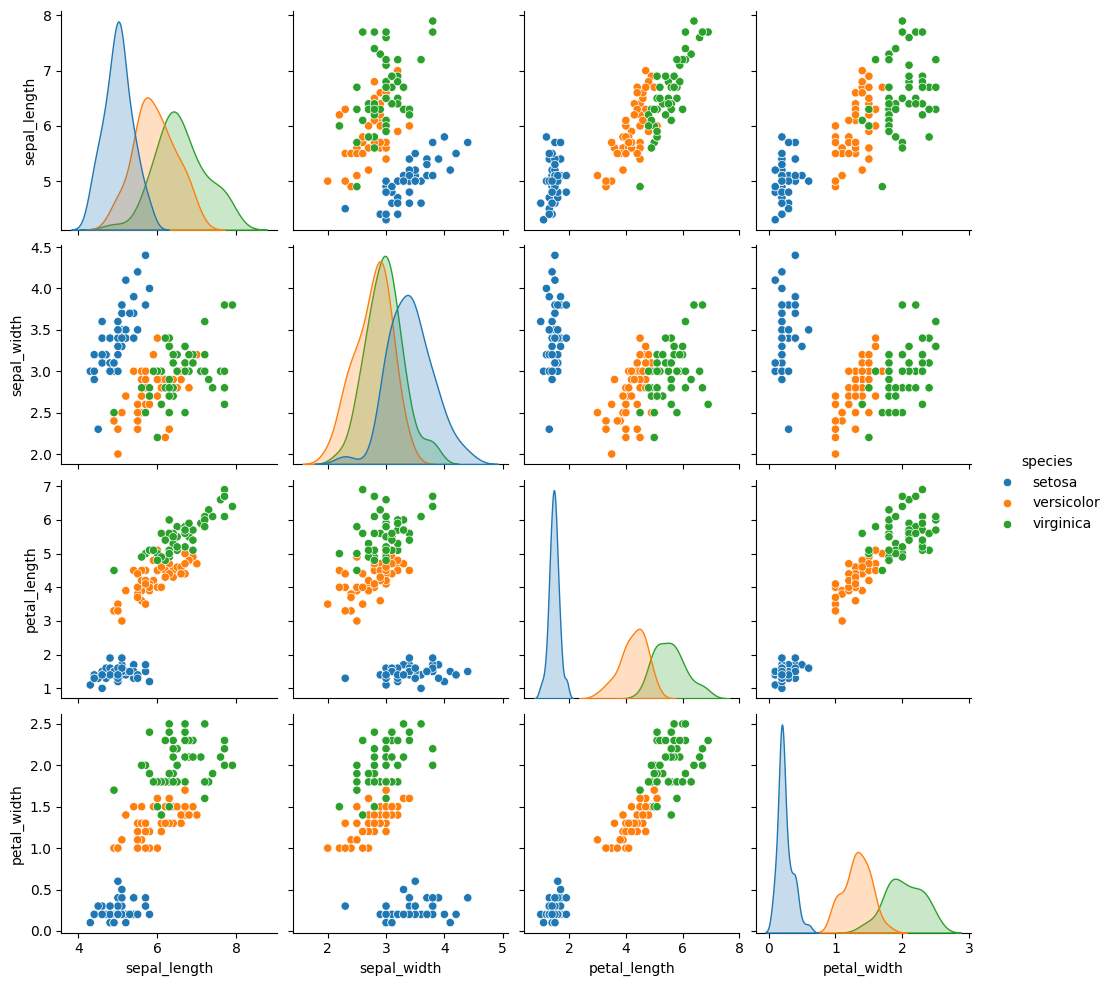

In [79]:
# Pairplot to visualize relationships between all numerical features across species
sns.pairplot(df, hue='species')
plt.show()

**Observation:**

The pairplot shows clear clustering of species, especially based on petal length and petal width, which provide strong class separation.
Sepal-based features exhibit significant overlap, indicating comparatively weaker discriminative ability.

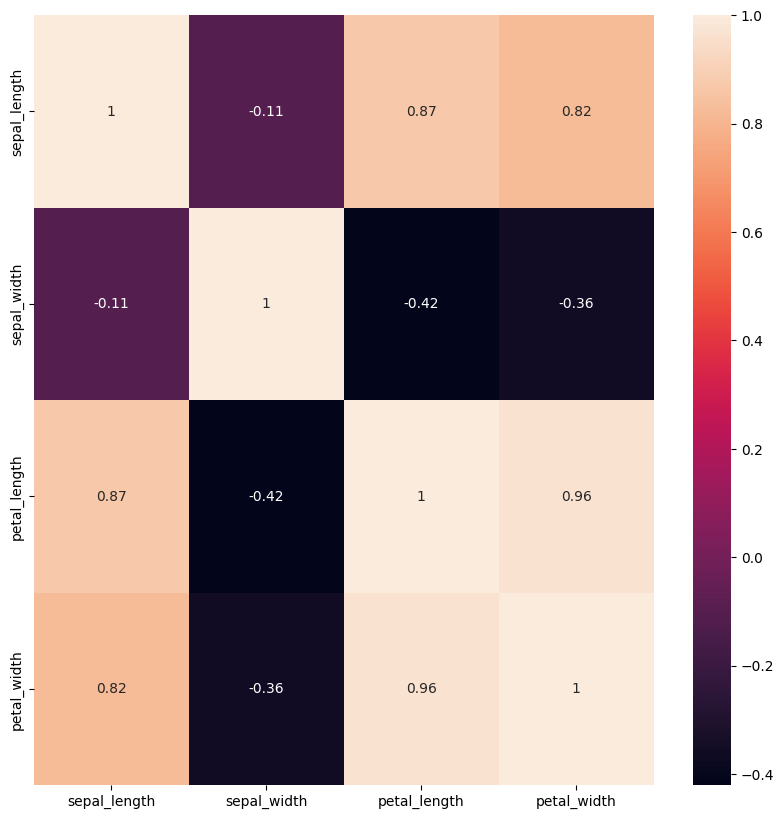

In [80]:
# Heatmap to visualize correlation between all numerical features
plt.figure(figsize=(10,10))
sns.heatmap(df[['sepal_length','sepal_width','petal_length','petal_width']].corr(), annot=True)
plt.show()

**Observation:**

The heatmap reveals a strong positive correlation between petal length and petal width, indicating they are closely related and highly influential features.
Sepal features show weaker correlations, suggesting comparatively lower importance for classification.

**Multivariate Summary:**

Multivariate analysis confirms that petal-based features are the strongest predictors, while sepal-based features contribute less to class separation

## **Data-Preprocessing:**

In [81]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


## Preprocessing Summary

Based on EDA, no missing values were found. Petal-based features were identified as the most influential predictors. No scaling was required as a Decision Tree model was used.

In [82]:
# Separating features and target
X = df.drop('species', axis=1)
y = df['species']

**Observation:**

Features and target variable were separated for model training.

In [83]:
# Encoding categorical target labels into numeric form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [84]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Observation:**

The categorical target labels were converted into numerical form to make them suitable for  algorithm.

## **Model Building:**

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


**Observation:**

The dataset was successfully split into training and testing sets using an 80:20 ratio. The training data will be used to learn model parameters, while the testing data will be used to evaluate model performance.

## **Model Training:**

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

**Observation:**

The Decision Tree model was trained using Gini impurity as the splitting criterion and a controlled tree depth to prevent overfitting.

In [90]:
model

DecisionTreeClassifier(max_depth=4, random_state=42)

In [91]:
# Train model on training data
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

**Observation:**

The model was trained successfully using the training dataset.

In [92]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## **Model Evaluation:**

In [93]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [94]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Observation:**

The Decision Tree model achieved high accuracy with strong precision and recall across all three species, indicating effective classification performance.

## **Conclusion:**

This project demonstrates a complete end-to-end machine learning workflow on the Iris flower dataset. Exploratory data analysis revealed that petal length and petal width are the most influential features.  
A Decision Tree classifier was trained and evaluated, achieving very high accuracy due to the dataset’s clean structure and strong class separability.
